# Red Black Graph - a DAG of Multiple, Interleaved Binary Trees

## Introduction

Red Black Trees are binary trees such that each node has an extra bit, color (red or black). This color bit us used to balance the tree as modifications are made. In working on data structures to effectively model familial relationships, we find the idea of adding a color bit to a DAG of multiple interleaved binary trees to have utility. The result is a new data structure and operations denoted as a "Red Black Graph". In this paper, we'll provide a formal definition of a Red-Black graph as well as illustrate several applications and benefits in modeling familial relationships.

## Formal Definition

A Red Black Graph is a DAG with the following constraints:

1. Any given node must have a color, either red or black
2. Any given node can have at most one outbound edge to a node of a given color

## Motivation

The relationships resulting from sexual reproduction can be modeled by a Red Black Graph, by arbitrarily assigning nodes that are male as Red and nodes that are female as Black. 



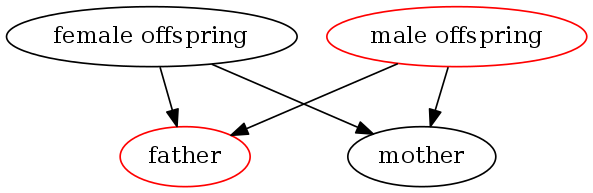

In [1]:
import networkx as nx
from nxpd import draw
G = nx.DiGraph()
G.graph['dpi'] = 120
G.add_node('father', color='red')
G.add_node('mother', color='black')
G.add_node('female offspring', color='black')
G.add_node('male offspring', color='red')
G.add_edge('male offspring', 'father')
G.add_edge('male offspring', 'mother')
G.add_edge('female offspring', 'father')
G.add_edge('female offspring', 'mother')
draw(G, show='ipynb')

Directionality is significant. Edges are drawn from the offspring to the parent to ensure the second constraint is observed. For the purposes of clarity in further discussion, we arbitrarily choose female offspring to be $vertex_{1}$, male ofspring to be $vertex_{2}$, father to be $vertex_{3}$ and mother to be $vertex_{4}$. 

For a given node in a Red Black graph there are two distinct "views" or perspectives. 

* Ancestry - For a given node if we consider the subset of the Red Black graph that consists of that node and all nodes reachable by following out-bound edges, we see this subset is a proper binary tree. We'll designate this as the ancestry view.
* Descendency - For a given node if we consider the subset of the Red Black graph that consists of that node and all nodes that can follow a traversal through the graph that reach that node, we see a DAG. We'll designate this as the descendency view.

## Adjacency Matrix

In graph theory an adjacency matrix is a square matrix used to represent the graph. The elements of the matrix are 1 if there is an edge between the nodes represented by the column index and the row index. Slightly more formally, with a graph of vertex set *V*, the adjacency matrix is a square |*V*| x |*V*| matrix, *A*, such that $A_{ij}$ is one when there is an edge from $vertex_{i}$ to $vertex_{j}$ and zero otherwise.

The example graph above would be represented by the following adjacency matrix.

\begin{vmatrix}
0 & 0 & 1 & 1 \\
0 & 0 & 1 & 1 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 \\
\end{vmatrix}

### Red-Black Graph Adjacency Matrix

We define the Red-Black adjacency matrix as follows: 
* elements are 2 if there is an edge between any vertex and a red vertex
* elements are 3 if there is an edge between any vertex and a black vertex 
* diagonal elements are 0 if the vertex is red
* diagonal elements are 1 if the vertex is black 

Slightly more formally, with a graph of vertex set *V*, where a vertex may be colored either *Red* or *Black*, the Red-Black adjacency matrix is a square |*V*| x |*V*| matrix, *A<sub>rb</sub>*, such that *A<sub>rb<sub>ij</sub></sub>* is:
* 1 if *i* == *j* and $vertex_{i}$ is *Black*
* 2 if there is an edge from $vertex_{i}$ to $vertex_{j}$ and $vertex_{j}$ is *Red*
* 3 if there is an edge from $vertex_{i}$ to $vertex_{j}$ and $vertex_{j}$ is *Black*
* 0 otherwise

With this definition, the example graph above would be represented by the following Red-Black adjacency matrix. 

\begin{vmatrix}
1 & 0 & 2 & 3 \\
0 & 0 & 2 & 3 \\
0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
\end{vmatrix}

### Observations

\begin{equation*}
|V_{black}| = trace(A_{rb})
\end{equation*} 

\begin{equation*}
|V_{red}| = |V| - trace(A_{rb})
\end{equation*}

## Transitive Closure of a Red-Black Adjacency Matrix

Transitive closure for an adjacency matrix, *A*, results in a matrix, *A<sup>+</sup>* that shows all vertices that are reachable from any given vertex. We examine the correlary, given a Red Black adjacency matrix, *A<sub>rb</sub>*, by computing the transitive closure, *A<sub>rb</sub><sup>+</sup>*, that results not only in reachability, but explicit information about how one node is reachable from another, including number of edges required to traverse as well as the explicit traversal path. 

### Pedigree Numbers and Generations

In recording familial relationships it is common to use a pedigree chart to present record the ancestry for a given person. 

<img src="img/pedigree-1.png" alt="Drawing" style="width: 600px;"/>

Note that in the above pedigree chart, the father's position is labeled "2", the mothers's "3", the paternal grandfather's "4", etc. We will refer to this labeling of the binary tree as the "pedigree number". 

#### Observations

* All male (red) vertices are labeled with an even number, and all female (black) vertices are labeled with an odd number
* The generation, or how many edges must be followed to connect the root vertex (position 1 in the above chart) with a given vertex, can be derived by taking the integral portion of $log_{2}$ of the vertex label. (Another way of expressing this is: if the pedigree number is represented in binary form, the generation is the positional value of the left most significant bit.)
* The traversal path from the root vertex to a given vertex can be derived from the pedigree number by successively right shifting out bits and using that bit to "walk" the traversal edge to a red vertex or black vertex.

A simple implementation of the *generation* and *traversal* functions follow:

In [3]:
def generation(pedigree_number):
    '''Given a pedigree_number, representing a relationship from a "root" vertex to an "ancester" vertex,
    return the number of edges that must be followed in order to "walk" from the "root" to the "ancester".'''
    x = pedigree_number
    gen = 0
    while (x > 1): 
        x >>= 1
        gen+=1
    return gen

def get_traversal_path(pedigree_number):
    '''Given a pedigree_number, representing a relationship from a "root" vertex to an "ancester" vertex,
    return the traversal path of edges to red or black vertices to "walk" from the "root" to the "ancesster".
    
    For example, input of 14 results in ['b', 'b', 'r'] which indicates that starting at the "root" vertex, follow
    the edge to the black vertex, then the edge to the black vertex then the edge to the red vertex.'''
    x = pedigree_number
    path = []
    mask = 1
    while (x > 1):
        path.insert(0, 'b') if x & mask else path.insert(0, 'r')
        x >>= 1
    return path

### Transitive Relationship Function

Consider the following case, 3 vertices, $vertex_{a}$, $vertex_{b}$ and $vertex_{c}$. Further, let's assume that $vertex_{b}$ is related to $vertex_{a}$ as defined by *pedigree_number* **x**, and that $vertex_{c}$ is related to $vertex_{b}$ by *pedigree_number* **y**. Therefor $vertex_{c}$ is related to $vertex_{a}$ by some *pedigree_number* **z**. We define the *avos* function or operator as:  **x** *avos* **y** = **z**. (*avos* is latin for ancestor.)

Let's use a concrete example as follows: $vertex_{a}$ may be any person; $vertex_{b}$ is that person's paternal grandfather (pedigree_number == 4); $vertex_{c}$ is $vertex_{b}$'s maternal grandmother (pedigree_number == 7). If we were to transcribe $vertex_{b}$'s pedigree into the proper place in $vertex_{a}$'s pedigree we'd see that $vertex_{c}$ has a pedigree_number of 19 in $vertex_{a}$'s pedigree. In other words, **4** *avos* **7** == **19**.

In order to uncover the arithmetic for this operator, let's look at the *pedigree numbers* for a few examples. In all cases, we'll assume that **I** am the person represented by $vertex_{a}$. The first column describes **my** relationship to $vertex_{b}$, the second column describes $vertex_{b}$'s relationship to $vertex_{c}$, the third column is the *pedigree number* that represents **my** relationship to $vertex_{b}$ \[pn(me, b)\], the forth column is the *pedigree number* that represents $vertex_{b}$'s relationship to $vertex_{c}$ \[pn(b, c)\], the final column is the *pedigree number* that represents **my** relationship to $vertex_{c}$ \[pn(me, c)\].

| b's relationship to me | c's relationship to b | pn(me, b) | pn(b, c) | pn(me, c) |
| ---------------------- | --------------------- | --------- | -------- | --------- |
| father                 | father                | 2         | 2        | 4         |
| father                 | mother                | 2         | 3        | 5         |
| mother                 | father                | 3         | 2        | 6         |
| mother                 | mother                | 3         | 3        | 7         |
| father                 | paternal grandfather  | 2         | 4        | 8         |
| maternal grandmother   | paternal grandfather  | 7         | 4        | 28        |

While there appears to be some sort of "counting" going on, it isn't obvious what function could be used to arrive at the correct result.

Let's look at the same information, but recase the numbers into base2.

| b's relationship to me | c's relationship to b | pn(me, b) | pn(b, c) | pn(me, c) |
| ---------------------- | --------------------- | --------- | -------- | --------- |
| father                 | father                | 10        | 10       | 100       |
| father                 | mother                | 10        | 11       | 101       |
| mother                 | father                | 11        | 10       | 110       |
| mother                 | mother                | 11        | 11       | 111       |
| father                 | paternal grandfather  | 10        | 100      | 1000      |
| maternal grandmother   | paternal grandfather  | 111       | 100      | 11100     |

While perhaps not obvious, upon examination of the binary representation, we see that the *avos* operator simply replaces the left most significant digit of pn(b,c)<sub>base2</sub> with the value of pn(me,b)<sub>base2</sub>.

A simple implementation of the *avos* function follows:


In [4]:
def avos(x, y):
    '''The avos product is a transitive relationship operator. 
    Given that:
      - vertex a is related to vertex b by x
      - vertex b is related to vertex c by y
    This product should return the value indicating how a is related to c
    '''
    
    # The domain of this function is all positive integers greater than 1
    if x <= 1 or y <= 1:
        raise ValueError(f'avos({x}, {y}) is not defined')
    
    # There are some edge cases that need to be considered, namely what is meant 
    generationNumber = generation(y)
    return (y & (2 **generationNumber - 1)) | (x << generationNumber)


We'll refer to this transitive relationship function/operator as the *avos* product for scalers.

### Transitive Closure for Red-Black Adjacency Matrix

We will define the transitive closure of a Red-Black adjacency matrix, *A<sub>rb</sub>* as *A<sub>rb</sub><sup>+</sup>* such that element (i, j) is the *pedigree number* that represents the relationship between $vertex_{i}$ and $vertex_{j}$. Furthermore *A<sub>rb</sub><sup>+</sup>* can be computed from *A<sub>rb</sub>* using a modified Warshall Algorithm.

In [1]:
def warshall(M):
    '''Computes the transitive closure of a Red Black adjacency matrix and as a side-effect, 
    the diameter.'''
    
    # Modification of stardard warshall algorithm:
    # * Replaces innermost loop's: `W[i][j] = W[i][j] or (W[i][k] and W[k][j])`
    # * Adds diameter calculation
    n = len(M)
    W = M
    diameter = 0
    for k in range(n):
        for i in range(n):
            for j in range(n):
                if W[i][k] > 1 and W[k][j] > 1:
                    W[i][j] = min(W[i][j], avos(W[i][k], W[k][j])) if not W[i][j] == 0 else avos(W[i][k], W[k][j])
                else:
                    W[i][j] = W[i][j]
                diameter = max(diameter, W[i][j])
    return W, generation(diameter)

In [1]:
#print(warshall([[0,2,3,0,0],[0,0,0,2,0],[0,0,1,0,0],[0,0,0,0,0],[2,0,0,0,1]]))

Let's look at the Red-Black adjacency matrix, *A<sub>rb</sub>*, for the following graph:

* vertex 0 - male offspring of vertex 1 and vertex 2
* vertex 1 - male offspring of vertex 3 and unknown (not in graph)
* vertex 2 - female offspring of unknown (neither in graph)
* vertex 3 - male offsprint of unknown (neither in graph)
* vertex 4 - female offsprint of vertex 0 and unknown (not in graph)


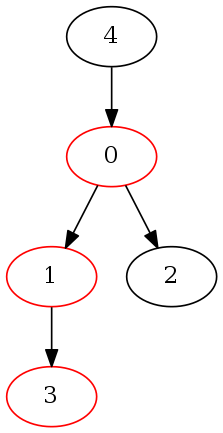

In [2]:
G = nx.DiGraph()
G.graph['dpi'] = 120
G.add_node('0', color='red')
G.add_node('1', color='red')
G.add_node('2', color='black')
G.add_node('3', color='red')
G.add_node('4', color='black')
G.add_edge('0', '1')
G.add_edge('0', '2')
G.add_edge('1', '3')
G.add_edge('4', '0')
draw(G, show='ipynb')


\begin{vmatrix}
0 & 2 & 3 & 0 & 0 \\
0 & 0 & 0 & 2 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
2 & 0 & 0 & 0 & 1 \\
\end{vmatrix}

Running this modified Warshall algorithm against this example matrix results in the following *A<sub>rb</sub><sup>+</sup>*:

\begin{vmatrix}
0 & 2 & 3 & 4 & 0 \\
0 & 0 & 0 & 2 & 0 \\
0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 \\
2 & 4 & 5 & 8 & 1 \\
\end{vmatrix}

### Observations

Given *A<sub>rb</sub><sup>+</sup>*, observe that:

* row vectors represent the ancestry view for a given vertex
* column vectors represent descendency view for a given vertex
* row vectors representing siblings will be identical
* column vectors representing siblings will be independant if either of the siblings have offspring represented in the graph
* determining whether *x* is an ancestor of *y* is **O**(1) and provided by *A<sub>rb</sub><sup>+</sup>*\[x, y\]
* determining whether *x* is a descendant of *y* is **O**(1) and provided by *A<sub>rb</sub><sup>+</sup>*\[y, x\]
* determining whether *x* is related to *y* is **O**(*m*) where *m* is the expected number of ancestors and *m* << |*V*|. Relationship is determined by element-wise comparision of the non zero elements of row vectors of x and y. Element-wise comparison yielding non zero in both row vectors indicates a common ancestor. The specific relationship is determined by the *pedigree numbers* of the respective row vector elements. (see xxxx)
* diameter of the graph is given by generation(max(*A<sub>rb</sub><sup>+</sup>*\[i, j\]))

## Conclusions

TODO: outline properties
TODO: outline "am I related"